In [ ]:
# solar viability rating alg
# median income by block -> can we make more granular? 
# research amt of solar energy (then the hours+roof space to produce it) needed to offset gas usage

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import math


In [144]:
solar_data = pd.read_csv('solar_data.csv')
census_data = pd.read_csv('census_data.csv')
gas_meter_data = pd.read_csv('gas_meter_data.csv')

In [102]:
# we have a list of the house_ids that are using gas heating
    #solar csv has sq_ft_of_roof_space which we can map to from the house id
# a function that maps house_id to the block
    # the block data has the median income

# function:
# for each house_id in the list of gas-heating houses map to their block using the function
# store their block
# retrieve block's median income from census_data.csv
# for each house_id in the list of gas-heating houses map to solar_data.csv to get avaliable square footage 
# put median_income and square_footage into the golden ratio function
# if no continue

# else append house_ids block # to a list of blocks 
# sort the list by number of times blocks are mentioned
# graph the blocks by how many houses each block has that passes the golden ratio
    # pick a threshold for how many houses is signifacant enough to put into a list of blocks we reccomend advertising solar energy to

In [145]:
#FUNCTION: Maps house to block
blocks_and_house_ids = census_data[['Block','house_ids']]
solar_house_ids = solar_data['house_id']
house_id_to_block = {}

for solar_row in range(len (solar_data. index)) :
    for census_row in range (len (census_data.index)) :
        house_ids_as_list = blocks_and_house_ids ['house_ids']. loc[census_row]
        solar_house_id = solar_house_ids.loc [solar_row]
        if solar_house_id in house_ids_as_list:
            house_id_to_block.update({solar_house_id:blocks_and_house_ids ['Block'].loc[census_row]})

#print(house_id_to_block.get("67741535"))   #prints block house is in

In [146]:
# find out if gas meter id attribute is not null in solar_data. if not, note down house id. these house ids are using gas

gas_house_ids = []


for solar_row in range(len(solar_data.index)):
       if math.isnan(solar_data['gas_meter_id'].loc[solar_row]):
               continue
       else:
            gas_house_ids.append(solar_data['house_id'].loc[solar_row])  


print(gas_house_ids)

# care about these houses - from these, select good candidates for solar
# next: aggregate gas meter readings to use when comparing with what solar can generate, to see if switching to solar is good idea

['a90ea0b3', '049bf03c', '569aaf4b', 'ac2f7c77', '7407e44b', '8c46fac9', '5edb8c2b', '0a4bda96', 'efd90c76', '399ac66c', '72be14aa', '7a94fe5b', '17013f80', '18f1daf5', '4ca0c4ec', 'f21423f0', 'a99e365d', 'c8d2352d', '6c40ece7', '6e369e62', 'b0d910d9', '44f1b9f3', '5c229c2c', 'cdaaab25', '20efba60', 'bed617be', '37a5ae24', 'a843fe8a', '55aad0b1', '000fe7ba', '2cf6190e', '0d12f2a9', 'c73e96d2', 'e0141bf2', '314fdb11', 'dec094c1', '53c0a6be', '64910021', '5977176c', '445a5d52', '1a0e7a9f', 'c10abddb', 'ae1d9225', 'be2d2305', 'c5988d9b', 'b590e55f', '50ee1f40', '79876464', '01699cd1', 'bf66339e', '57ab0b40', 'cf1f0e42', 'd5916302', '376d88fb', '2eddf669', '66b9f47a', 'd0e8416b', '88194881', '68804a61', '135afd08', 'd09c7764', 'c109f9ff', 'ba141335', 'b58c0ce3', 'a602dc54', 'ebb6aac2', 'f49a40a7', 'e48445a5', '4aae9cc0', 'c6135eac', '4ad69f26', '50d1ca84', '3d870d2d', 'e69c77c6', 'e8bb8c9f', 'c4ea6ba3', '441a2a56', '9b089c80', 'c038a5f0', 'a708c4b7', 'c296901c', '342b3bfc', 'a6787838', 'd4

In [147]:
gas_readings = gas_meter_data.select_dtypes(include='float64').columns
gas_meter_data['total_gas_usage'] = gas_meter_data[gas_readings].sum(axis = 1)
print(gas_meter_data[['house_id', 'total_gas_usage']])

      house_id  total_gas_usage
0     a90ea0b3             0.00
1     049bf03c             0.00
2     569aaf4b          7125.84
3     5edb8c2b          3731.52
4     0a4bda96             0.00
...        ...              ...
5742  eb13e651         22263.12
5743  6981379f           378.72
5744  153f86aa             0.00
5745  084d9c81         11122.80
5746  4a9493dc             0.00

[5747 rows x 2 columns]


In [148]:
def goldenratio (median_income: int, sq_ft_avaliable: int, total_gas_usage_per_year: int) -> bool:
    #10% of income should go to heating
    #a single panel generates 2kWh a day
    total_solar_panels = math.floor(sq_ft_avaliable/15) #rounds down to the closest integer, 3ft by 5ft panels
    energy_generated_per_year = total_solar_panels * 2 * 365 #2kWh a day for 265 days

    if total_gas_usage_per_year > energy_generated_per_year:
        return False
    
    else: 
        cost_ratio = round(median_income/(total_solar_panels * 15 * 5)) #$5 per squarefoot of solar panels
        if cost_ratio > 3: #if cost_ratio is greater than 30% of median income the solar switch isnt feasible
            return False
        else:
            return True

In [149]:
def median_income_retrieval (house_id_to_find: str) -> int:
    Median_Income_available = 0
    # retrieves house_id's block number
    block = house_id_to_block.get(house_id_to_find)
    #finds row the Block is listed in the census_csv
    selected_row_in_census_data = census_data[census_data['Block'] == block] 
    # if the row isn't empty we retrieve the Block's median income
    if not selected_row_in_census_data.empty:
        Median_Income_available = selected_row_in_census_data['Median Income'].iloc[0]
        #print("Median Income for block {}: {}".format(block, Median_Income_available))
    return Median_Income_available

In [150]:
def sq_ft_retrieval (house_id_to_find: str) -> int:
    sq_ft_available = 0
    #finds row the house_id is listed in the solar_csv
    selected_row_in_solar_data = solar_data[solar_data['house_id'] == house_id_to_find] 
    # if the row isn't empty we retrieve the house_id's sq_ft
    # The .iloc[0] is used to access the first row's sq_ft_available_for_solar_panels value from the selected_row 
    if not selected_row_in_solar_data.empty:
        sq_ft_available = selected_row_in_solar_data['sq_ft_available_for_solar_panels'].iloc[0]
        #print("sq_ft_available_for_solar_panels for house_id {}: {}".format(house_id_to_find, sq_ft_available))
    return sq_ft_available

In [151]:
# i changed it to return both a list of the house ids in addition to the list of the blocks

long_lat_list = []
def blocks_list() -> list: #returns list of golden ratio blocks
    global long_lat_list
    list_of_blocks_with_golden_ratio_houses = []
    list_of_houses_with_golden_ratio = []
    blocks_with_long_lat = []
    # solar_house_ids_and_sqft = solar_data[['house_id', 'sq_ft_available_for_solar_panels']]
    # blocks_and_house_ids = census_data[['Block','Median Income']]

    # loop through for the length of the list of gas-houses
    for gas_house in range(len(gas_house_ids)): 
        #assigns house_id being used
        house_id_to_find = gas_house_ids[gas_house]
        
        Median_Income_available = median_income_retrieval(house_id_to_find)
        #print("Median Income for house {}: {}".format(house_id_to_find, median_income_retrival(house_id_to_find)))
        
        sq_ft_available = sq_ft_retrieval(house_id_to_find)
        #print("sq_ft_available_for_solar_panels for house_id {}: {}".format(house_id_to_find, sq_ft_retrieval(house_id_to_find)))
        if house_id_to_find in gas_meter_data['house_id'].values:
            total_gas_usage_per_year = gas_meter_data.loc[gas_meter_data['house_id'] == house_id_to_find, 'total_gas_usage'].values[0]

            if goldenratio(Median_Income_available, sq_ft_available, total_gas_usage_per_year):
                long_lat = (solar_data.loc[solar_data['house_id'] == house_id_to_find, ['lat', 'long']].values[0])
                block = house_id_to_block.get(house_id_to_find)
                list_of_blocks_with_golden_ratio_houses.append(block)
                blocks_with_long_lat.append({'block': block, 'lat': long_lat[0], 'long': long_lat[1]})
        else:
            continue
    #print(list_of_blocks_with_golden_ratio_houses)
    return list_of_blocks_with_golden_ratio_houses, blocks_with_long_lat

blocks, blocks_with_long_lat = blocks_list()
#print(blocks)
print(blocks_with_long_lat)

[{'block': '811400-1', 'lat': 42.2064547, 'long': -72.59922622}, {'block': '812103-1', 'lat': 42.1902992, 'long': -72.61621507}, {'block': '811500-1', 'lat': 42.19546865, 'long': -72.61005314}, {'block': '812001-2', 'lat': 42.20570675, 'long': -72.62013974}, {'block': '812104-1', 'lat': 42.19506375, 'long': -72.6242395}, {'block': '811400-2', 'lat': 42.2047075, 'long': -72.59984556}, {'block': '812101-2', 'lat': 42.1735854, 'long': -72.6470293}, {'block': '812101-2', 'lat': 42.1735854, 'long': -72.6470293}, {'block': '811800-1', 'lat': 42.20932035, 'long': -72.61720205}, {'block': '812104-3', 'lat': 42.19721315, 'long': -72.6317185}, {'block': '812104-3', 'lat': 42.19721315, 'long': -72.6317185}, {'block': '811500-1', 'lat': 42.19849755, 'long': -72.608112}, {'block': '811500-1', 'lat': 42.19843555, 'long': -72.60876784}, {'block': '811400-1', 'lat': 42.20635865, 'long': -72.59816172}, {'block': '812001-1', 'lat': 42.2084697, 'long': -72.61757005}, {'block': '811800-2', 'lat': 42.21136

In [163]:
# Sort list of blocks a two column list, block number and how many times it's repeated
def count_block_occurences(lst) -> dict:
    counts = {}
    for item in lst:
        if item in counts:
            counts[item] += 1
        else:
            counts[item] = 1
    
    # Create a new list with unique values and their counts
    result = [[key, value] for key, value in counts.items()]
    return result

sorted_list = count_block_occurences(blocks_list()[0])
print(sorted_list)

[['811400-1', 47], ['812103-1', 13], ['811500-1', 50], ['812001-2', 13], ['812104-1', 27], ['811400-2', 36], ['812101-2', 11], ['811800-1', 12], ['812104-3', 2], ['812001-1', 60], ['811800-2', 50], ['811600-4', 43], ['811500-2', 66], ['812001-3', 31], ['811800-5', 12], ['812103-2', 17], ['811800-3', 18], ['811700-2', 17], ['811600-2', 38], ['812104-4', 3], ['811600-3', 2], ['811600-1', 31], ['811700-1', 20], ['812002-1', 6], ['812002-4', 2], ['812104-2', 6], ['811800-4', 3], ['812101-1', 3], ['811900-1', 14], ['812101-3', 2]]


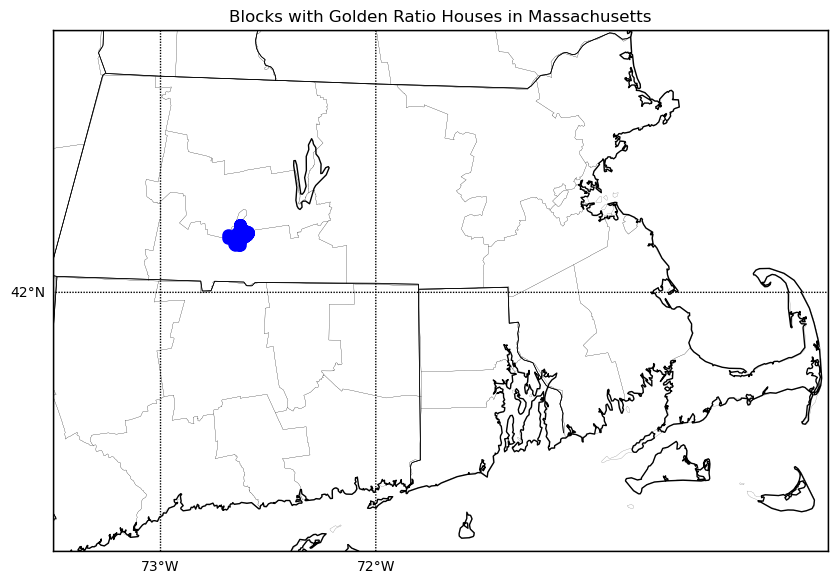

In [152]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

def plot_on_map(blocks_with_long_lat):
    # Create a Basemap instance
    plt.figure(figsize=(10, 8))
    map = Basemap(projection='merc', llcrnrlat=41.1, urcrnrlat=42.9, llcrnrlon=-73.5, urcrnrlon=-69.9, resolution='h')

    # Draw map details
    map.drawcoastlines()
    map.drawcountries()
    map.drawstates()
    map.fillcontinents(color='lightgray', zorder=0)
    map.drawmapboundary(fill_color='white')

    # Draw meridians and parallels
    map.drawparallels(range(41, 43), labels=[1, 0, 0, 0])
    map.drawmeridians(range(-73, -71), labels=[0, 0, 0, 1])

    # Draw town names
    map.drawcounties()

    # Plot blocks
    for block_data in blocks_with_long_lat:
        x, y = map(block_data['long'], block_data['lat'])
        map.plot(x, y, 'bo', markersize=8, label=block_data['block'])

    # Show plot
    plt.title('Blocks with Golden Ratio Houses in Massachusetts')
    plt.show()

blocks, blocks_with_long_lat = blocks_list()
plot_on_map(blocks_with_long_lat)



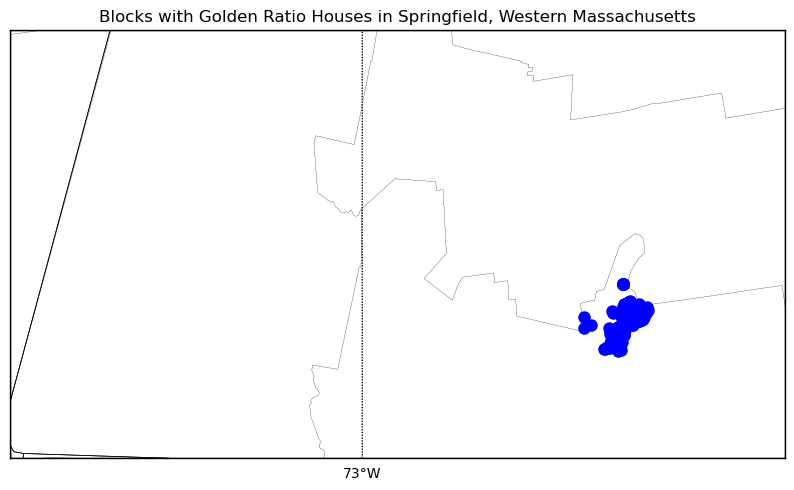

In [153]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

def plot_on_map(blocks_with_long_lat):
    # Create a Basemap instance
    plt.figure(figsize=(10, 8))
    map = Basemap(projection='merc', llcrnrlat=42.05, urcrnrlat=42.5, llcrnrlon=-73.5, urcrnrlon=-72.4, resolution='h')

    # Draw map details
    map.drawcoastlines()
    map.drawcountries()
    map.drawstates()
    map.fillcontinents(color='lightgray', zorder=0)
    map.drawmapboundary(fill_color='white')

 # Draw meridians and parallels
    map.drawparallels(range(41, 43), labels=[1, 0, 0, 0])
    map.drawmeridians(range(-73, -71), labels=[0, 0, 0, 1])

    # Draw town names
    map.drawcounties()
    # Plot blocks
    for block_data in blocks_with_long_lat:
        x, y = map(block_data['long'], block_data['lat'])
        map.plot(x, y, 'bo', markersize=8, label=block_data['block'])

    # Show plot
    plt.title('Blocks with Golden Ratio Houses in Springfield, Western Massachusetts')
    plt.show()

blocks, blocks_with_long_lat = blocks_list()
plot_on_map(blocks_with_long_lat)


AttributeError: type object 'map' has no attribute 'drawparallels'

/Users/sophiacox/anaconda3/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/Users/sophiacox/anaconda3/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_ocean.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/Users/sophiacox/anaconda3/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/Users/sophiacox/anaconda3/lib/python3.11/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


Error in callback <function _draw_all_if_interactive at 0x15df12840> (for post_execute):


KeyboardInterrupt: 

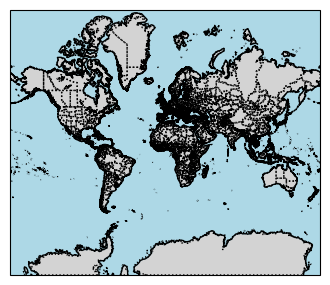

In [137]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def plot_on_map(blocks_with_long_lat):
    # Create a Cartopy instance
    plt.figure(figsize=(4, 4))
    ax = plt.axes(projection=ccrs.Mercator())

    # Add map features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.add_feature(cfeature.STATES.with_scale('10m'), linestyle=':')
    ax.add_feature(cfeature.LAND, color='lightgray')
    ax.add_feature(cfeature.OCEAN, color='lightblue')

    # Draw meridians and parallels
    map.drawparallels(range(41, 43), labels=[1, 0, 0, 0])
    map.drawmeridians(range(-73, -71), labels=[0, 0, 0, 1])

    # Draw town names
    map.drawcounties()


    # Plot blocks
    for block_data in blocks_with_long_lat:
        ax.plot(block_data['long'], block_data['lat'], 'bo', markersize=8, label=block_data['block'])

    # Add town names
    ax.text(-72.58, 42.1, 'Springfield', transform=ccrs.PlateCarree(), fontsize=12, fontweight='bold', color='red')

    # Show plot
    plt.title('Blocks with Golden Ratio Houses in Springfield, Western Massachusetts')
    plt.show()

blocks, blocks_with_long_lat = blocks_list()
plot_on_map(blocks_with_long_lat)



In [155]:
# function to get the percentage of how many golden ratio houses are in a block

golden_ratio_houses_per_block_percentage = {}

for index in range(len(sorted_list)):
        row_index = census_data.index.get_loc(census_data[census_data['Block'] == sorted_list[index][0]].index[0]) # gets index in census data
        total_housing_units_in_block = census_data.loc[row_index, 'Total Housing Units']
        gr_houses_per_block = sorted_list[index][1]
        gr_houses_in_block_percentage = (gr_houses_per_block/total_housing_units_in_block) * 100
        gr_houses_in_block_percentage = round(gr_houses_in_block_percentage, 2)
        golden_ratio_houses_per_block_percentage[sorted_list[index][0]] = gr_houses_in_block_percentage

print(len(golden_ratio_houses_per_block_percentage))

30


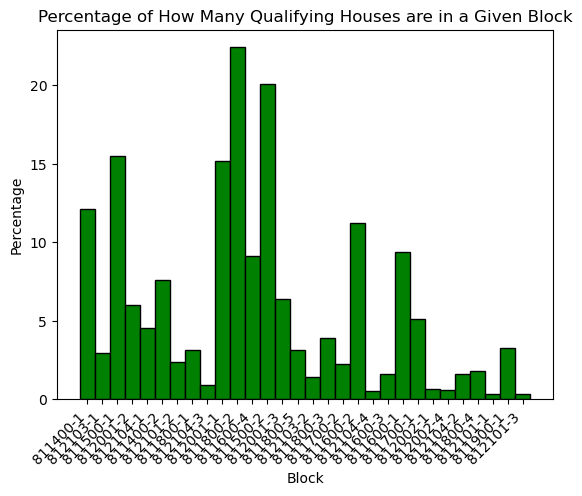

In [156]:
plt.bar(golden_ratio_houses_per_block_percentage.keys(), golden_ratio_houses_per_block_percentage.values(), width=1, color='g', edgecolor='black')
plt.title('Percentage of How Many Qualifying Houses are in a Given Block')
plt.xticks(rotation=45, ha='right')
plt.rc('xtick', labelsize=6)
plt.xlabel("Block")
plt.ylabel("Percentage")
plt.show()

In [166]:
# make new csv with golden ratio data
# commented out code is for making a .csv w 655 rows, each row for each qualifying house id

# gr_house_ids = golden_ratio_house_list
# gr_blocks = golden_ratio_blocks_list
gr_blocks_condensed = []

for item in sorted_list:
     block = item[0]
     gr_blocks_condensed.append(block)

gr_blocks = gr_blocks_condensed

# get median income
gr_median_income = []
for block in gr_blocks:
        row_index = census_data.index.get_loc(census_data[census_data['Block'] == block].index[0]) # gets index 
        if census_data.loc[row_index, 'Block'] == block: # if block is in the golden ratio list
            median_income = census_data.loc[row_index, 'Median Income']
            gr_median_income.append(median_income)
        else:
            continue

# get median year structure built
gr_median_year_structure_built = []
for block in gr_blocks:
        row_index = census_data.index.get_loc(census_data[census_data['Block'] == block].index[0]) # gets index 
        if census_data.loc[row_index, 'Block'] == block: # if the block is in the golden ratio list
            median_year_structure_built = census_data.loc[row_index, 'Median Year Structure Built']
            if median_year_structure_built == 0:
                 median_year_structure_built = 1939 # data cleaning because data shows all 0 rows have most in 'pre1939' column
            gr_median_year_structure_built.append(median_year_structure_built)
        else:
            continue

# get poverty rate
gr_poverty_rate = []
for block in gr_blocks:
        row_index = census_data.index.get_loc(census_data[census_data['Block'] == block].index[0]) # gets index 
        if census_data.loc[row_index, 'Block'] == block: # if block is in the golden ratio list
            poverty = census_data.loc[row_index, 'Poverty']
            total_population = census_data.loc[row_index, 'Total Population']
            poverty_rate = (poverty/total_population)
            poverty_rate = round(poverty_rate, 2)
            gr_poverty_rate.append(poverty_rate)
        else:
            continue

# get employment rate
gr_employment_rate = []
for block in gr_blocks:
        row_index = census_data.index.get_loc(census_data[census_data['Block'] == block].index[0]) # gets index 
        if census_data.loc[row_index, 'Block'] == block: # if block is in the golden ratio list
            employment = census_data.loc[row_index, 'Employment Rate']
            total_population = census_data.loc[row_index, 'Total Population']
            employment_rate = (employment/total_population)
            employment_rate = round(employment_rate, 2)
            gr_employment_rate.append(employment_rate)
        else:
            continue

# dict = {'House ID': gr_house_ids, 'Block': gr_blocks, 'Median Income': gr_median_income, 'Median Year Structure Built': gr_median_year_structure_built, 'Poverty': gr_poverty, 'Employment Rate': gr_employment_rate}
dict = {'Block': gr_blocks, 'Median Income': gr_median_income, 'Median Year Structure Built': gr_median_year_structure_built, 'Poverty Rate': gr_poverty_rate, 'Employment Rate': gr_employment_rate, 'Qualify Rate': golden_ratio_houses_per_block_percentage.values()}


df = pd.DataFrame(dict)
     
# saving the data frame
df.to_csv('golden_ratio_house_data.csv')